## Logistic Regression Synthetic

In [38]:
import numpy as np
from numpy import linalg as la
from methods import SGD, SGD_decr, SPS_decr
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import sys
import math
import seaborn as sns
import random
from tqdm import tqdm
%config InlineBackend.figure_format = 'svg'

markers = ["v","^","<",">","o","s","p","P","*"]
colors = sns.color_palette("colorblind")

### Problem Definition

$$ 
f(x) = \frac{1}{2 n} \sum_{i=1}^n \log (1 + exp(-y_i a_i^T x)) + \frac{\lambda}{2} \|x\|^2_2
$$ 
$$
f_i(x) = \frac{1}{2} \log(1+exp(-y_i a^T_i x)) + \frac{\lambda}{2} \|x\|^2
$$
$$
\nabla f_i(x) = \frac{1}{2} \frac{-y_i}{exp(y_i a_i^T x) + 1} a_i + \lambda x
$$
$$
\nabla^2 f_i(x) = \frac{1}{2} \frac{exp(y_i a_i^T x)y_i^2}{(1+exp(y_i a_i^T x))^2} a_ia_i^T + \lambda 
$$

In [39]:
n = 500
d = 100
lambd = 0.000#1/n### GD solution
A = np.random.randn(n, d)
y = np.random.choice([-1, 1], size = n)
mu =  lambd
L = la.norm(A, axis=1, ord=2)**2/8 + lambd
print(A.shape)

#initialization
x0=5*np.random.randn(d,) #starting position

def cost(x, random_ind):
    batch_size = len(random_ind)
    f = np.sum(np.log(1+np.exp(-np.dot(A[random_ind], x) * y[random_ind])))/(2*batch_size) + (lambd/2)*np.sum(x**2)
    return f

def grad(x, random_ind):
    batch_size = len(random_ind)
    num = -y[random_ind]
    den = (1 + np.exp(np.dot(A[random_ind], x) * y[random_ind]))
    c = num/den
    c2 = np.dot(c.T,A[random_ind])
    final_grad = (c2)/(2*batch_size) + lambd * x
    return final_grad

def hess(x):
    hess_res = lambd*np.identity(d)
    for i in range(n):
        update_hess = (0.5/n) * (y[i]**2) * (np.exp(y[i]*np.dot(A[i],x))) * np.outer(A[i],A[i]) / (1+np.exp(y[i]*np.dot(A[i],x)))**2
        hess_res = hess_res + update_hess
    eigs,_ = la.eig(hess_res)
    return np.min(eigs),np.max(eigs)

(500, 100)


### GD solution

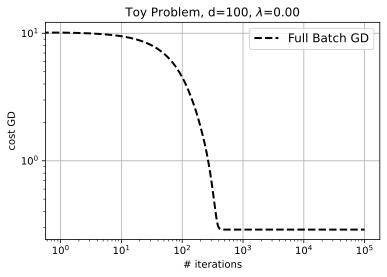

In [40]:
#full batch
batch_size = n
K = 100000 #number of iterations
gamma = 1
_,ff_star,_ = SGD(cost, grad, hess, K, gamma, x0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost GD')
plt.loglog(ff_star,'--',color = 'k',linewidth=2,label = 'Full Batch GD', markevery=2000)
plt.legend(fontsize=12)
plt.title(r"Toy Problem, d="+ str(d)+', $\lambda$={:.2f}'.format(lambd))
ax.grid()

### Running Optimizers

In [41]:
K_record_times = np.power(np.arange(0,45),3)
K=K_record_times[-1]
nexp = 5
compute_hess = True

#running optimizers
methods=[]
f_hist=[]
gammas_hist = []
mu_hist = []
L_hist = []

#sampling batches at the beginning
bs = 20


c = 0.05
gamma_max = 10
decr = 'sqrt'
name,ff,gammas,mus,Ls = SPS_decr(cost,grad,hess,nexp, K_record_times, compute_hess, c, decr, gamma_max, x0, bs, n)
methods.append(name)
f_hist.append(ff)
gammas_hist.append(gammas)
mu_hist.append(mus)
L_hist.append(Ls)
print('done')


c = 0.1
gamma_max = 10
decr = 'sqrt'
name,ff,gammas,mus,Ls = SPS_decr(cost,grad,hess,nexp, K_record_times, compute_hess, c, decr, gamma_max, x0, bs, n)
methods.append(name)
f_hist.append(ff)
gammas_hist.append(gammas)
mu_hist.append(mus)
L_hist.append(Ls)
print('done')


c = 0.5
gamma_max = 10
decr = 'sqrt'
name,ff,gammas,mus,Ls = SPS_decr(cost,grad,hess,nexp, K_record_times, compute_hess, c, decr, gamma_max, x0, bs, n)
methods.append(name)
f_hist.append(ff)
gammas_hist.append(gammas)
mu_hist.append(mus)
L_hist.append(Ls)
print('done')

c = 1
gamma_max = 10
decr = 'sqrt'
name,ff,gammas,mus,Ls = SPS_decr(cost,grad,hess,nexp, K_record_times, compute_hess, c, decr, gamma_max, x0, bs, n)
methods.append(name)
f_hist.append(ff)
gammas_hist.append(gammas)
mu_hist.append(mus)
L_hist.append(Ls)
print('done')

c = 5
gamma_max = 10
decr = 'sqrt'
name,ff,gammas,mus,Ls = SPS_decr(cost,grad,hess,nexp, K_record_times, compute_hess, c, decr, gamma_max, x0, bs, n)
methods.append(name)
f_hist.append(ff)
gammas_hist.append(gammas)
mu_hist.append(mus)
L_hist.append(Ls)
print('done')


done
done
done
done
done


### Loss

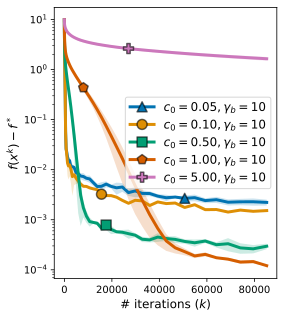

In [45]:
scale = 1
fig, ax = plt.subplots(figsize=(4,5))
markers = ["^","o","s","p","P","*"]
colors = sns.color_palette('colorblind')

mean_f = np.mean(f_hist[0]-f_sol,1)
std_f = np.std(f_hist[0], 1)
plt.fill_between(K_record_times,mean_f-scale*std_f,mean_f+scale*std_f , alpha=0.2, fc=colors[0])
plt.plot(K_record_times,mean_f,color = colors[0],linewidth=3,label = methods[0], markevery=[37], marker = markers[0],markersize = 10,markeredgewidth=1.5, markeredgecolor=[0,0,0,0.6])

scale =0.1

mean_f = np.mean(f_hist[1]-f_sol,1)
std_f = np.std(f_hist[2], 1)
plt.fill_between(K_record_times,mean_f-scale*std_f,mean_f+scale*std_f , alpha=0.2, fc=colors[1])
plt.plot(K_record_times,mean_f,color = colors[1],linewidth=3,label = methods[1], markevery=[25], marker = markers[1],markersize = 10,markeredgewidth=1.5, markeredgecolor=[0,0,0,0.6])

scale = 1
mean_f = np.mean(f_hist[2]-f_sol,1)
std_f = np.std(f_hist[2], 1)
plt.fill_between(K_record_times,mean_f-scale*std_f,mean_f+scale*std_f , alpha=0.2, fc=colors[2])
plt.plot(K_record_times,mean_f,color = colors[2],linewidth=3,label = methods[2], markevery=[26], marker = markers[2],markersize = 10,markeredgewidth=1.5, markeredgecolor=[0,0,0,0.6])

scale =0.5

mean_f = np.mean(f_hist[3]-f_sol,1)
std_f = np.std(f_hist[3], 1)
plt.fill_between(K_record_times,mean_f-scale*std_f,mean_f+scale*std_f , alpha=0.2, fc=colors[3])
plt.plot(K_record_times,mean_f,color = colors[3],linewidth=3,label = methods[3], markevery=[20], marker = markers[3],markersize = 10,markeredgewidth=1.5, markeredgecolor=[0,0,0,0.6])
scale = 1


mean_f = np.mean(f_hist[4]-f_sol,1)
std_f = np.std(f_hist[4], 1)
plt.fill_between(K_record_times,mean_f-scale*std_f,mean_f+scale*std_f , alpha=0.2, fc=colors[4])
plt.plot(K_record_times,mean_f,color = colors[4],linewidth=3,label = methods[4], markevery=[30], marker = markers[4],markersize = 10,markeredgewidth=1.5, markeredgecolor=[0,0,0,0.6])



plt.yscale("log")
plt.xscale("linear")
#plt.ylim([0.0025,30])
plt.legend(fontsize=12)
plt.xlabel('# iterations $(k)$',fontsize=12)
plt.ylabel('$f(x^k)-f^*$',fontsize=12)
fig.savefig('Toy_Logistic_regression_SPS_sensitivity_c0_2',dpi=200, bbox_inches='tight')


### Effective Stepsize

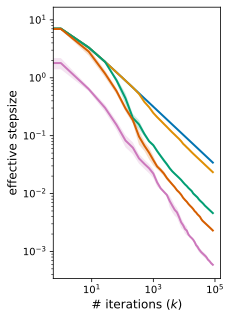

In [43]:
markers = ["v","^","<",">","o","s","p","P","*"]
colors = sns.color_palette("colorblind")

#plotting angles
fig, ax = plt.subplots(figsize=(3,5))
plt.xlabel('# iterations $(k)$',fontsize=12)
plt.ylabel('effective stepsize',fontsize=12)
for i in range(len(methods)):
    mean_g = np.mean(gammas_hist[i],1)
    std_g = np.std(gammas_hist[i], 1)
    plt.fill_between(K_record_times, mean_g-scale*std_g,mean_g+scale*std_g , alpha=0.2, fc=colors[i])
    plt.plot(K_record_times, mean_g,color = colors[i],linewidth=2,label = methods[i], markevery=2000)
plt.yscale("log")
plt.xscale("log")    
fig.savefig('Toy_Logistic_regression_SPS_sensitivity_gamma_b_gammas.png',dpi=200, bbox_inches='tight')
